# Gene expression

**Import**

In [3]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [7]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/MAC/cluster_adata.h5ad'

In [5]:
test_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/CHIMP/cluster_adata.h5ad'

In [8]:
adata = sc.read(adata_input)

In [6]:
test = sc.read(adata_input)

In [9]:
adata

AnnData object with n_obs × n_vars = 5755 × 23530
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
adata

AnnData object with n_obs × n_vars = 5755 × 23530
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
# vector for genes with -IT in names, True/False
intronic = ['-IT' in i for i in adata.var_names] 

In [6]:
intr_genes = adata[:,intronic].var_names

In [7]:
intr_genes # in chromosomal order

Index(['ERI3-IT1', 'AGBL4-IT1', 'NEGR1-IT1', 'WARS2-IT1', 'ITPKB-IT1',
       'ANKRD44-IT1', 'VWC2L-IT1', 'MAGI1-IT1', 'RNF216-IT1', 'NRG1-IT1',
       'CACNA1C-IT3', 'FGF14-IT1', 'DIP2A-IT1'],
      dtype='object')

Intronic transcripts

In [8]:
len(intr_genes)

13

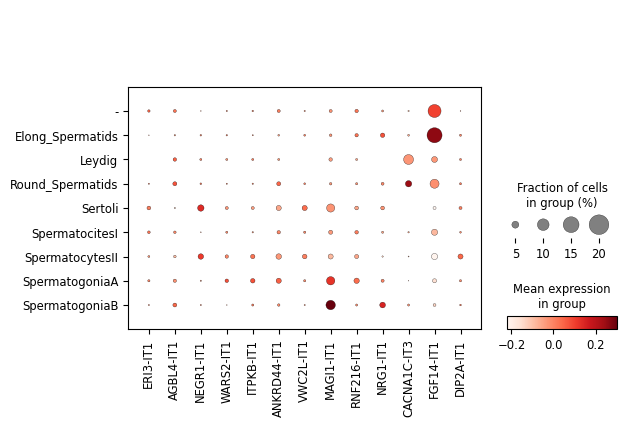

In [9]:
sc.pl.dotplot(adata, intr_genes[:15], groupby='spermatogenesis_types')

In [10]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [32]:
LINC_genes = adata[:,LINC].var_names

In [12]:
LINC_genes

Index(['LINC01409', 'LINC01128', 'LINC01342', 'LINC01786', 'LINC02780',
       'LINC01672', 'LINC01714', 'LINC02606', 'LINC02766', 'LINC01772',
       ...
       'LINC01278', 'LINC00630', 'LINC01285', 'LINC00629', 'LINC00892',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1183)

1183 LINC genes in total are expressed

In [13]:
#sc.pl.stacked_violin(adata, genes_to_plot, groupby='spermatogenesis_types', rotation=10);

NameError: name 'genes_to_plot' is not defined

In [ ]:
#ax = sc.pl.stacked_violin(adata, groupby='spermatogenesis_types', swap_axes=False, dendrogram=True)


In [ ]:
#sc.pl.violin(adata, [], groupby='spermatogenesis_types');

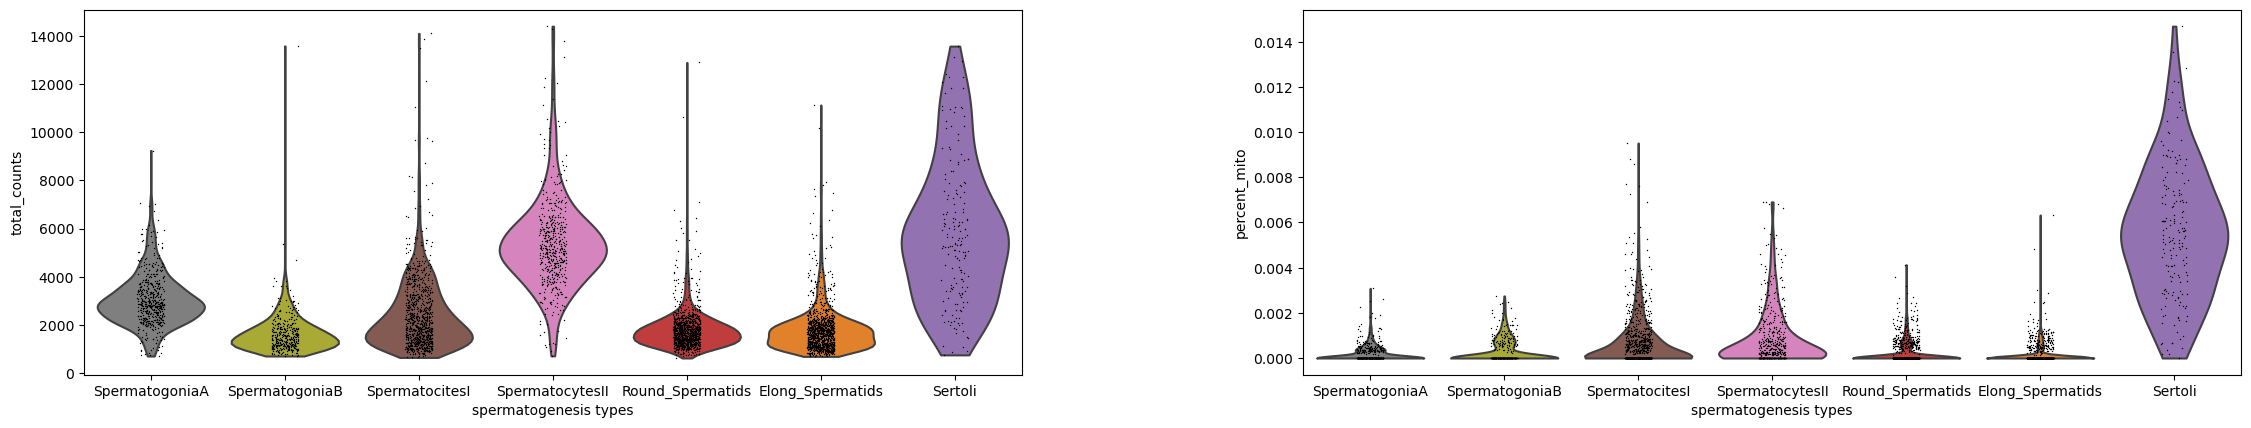

In [14]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'percent_mito'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocitesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [15]:
pd.DataFrame(adata.uns['DE_leiden']['names']).head() # top 5 ranked genes for each cluster

,0,1,2,3,4,5,6,7,8
0,NFIC,TEX51,TTC28,LRRIQ1,FOXP1,ANKRD30A,KCNQ1,LOC101929200,MALAT1
1,HDAC11,SMIM23,HLA-B,BCR,ACTR3B,ZNF385D,amplicon-chrY-TSPY1/10/2/3/4/8,CLU,TSHZ2
2,DRICH1,COL25A1,PFDN6,RGL4,TENM3,ANKRD30B,KCNQ1OT1,TBX22,DCN
3,CCSER1,CNBD1,TEX41,GLIPR1L1,RBFOX1,LOC101927284,TTC3,CTNNA2,LAMA2
4,PRM1,ADGRL3,RRP8,PACRG,FOXP2,CATSPER2,LOC101928697,GPC5,EBF1


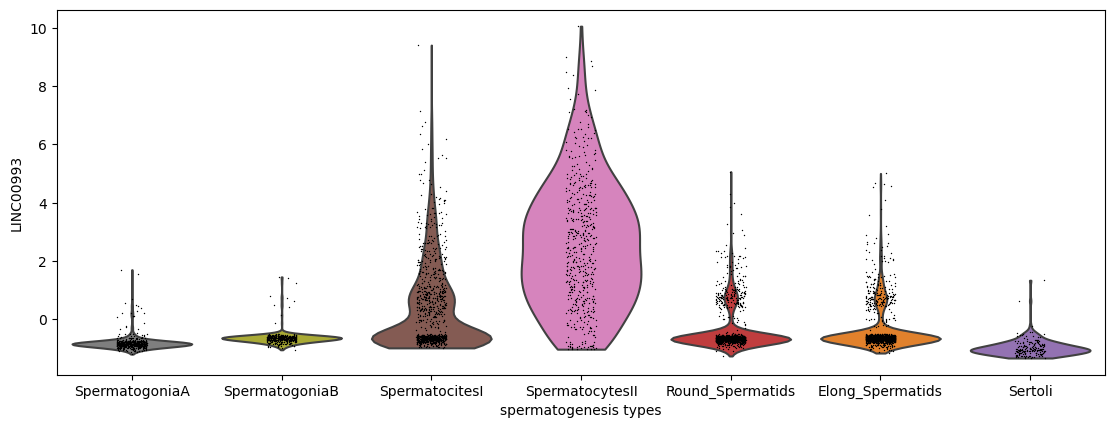

In [33]:
# If you want to compare a certain gene across groups
# no. 1 in  round spermatids
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC00993'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocitesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

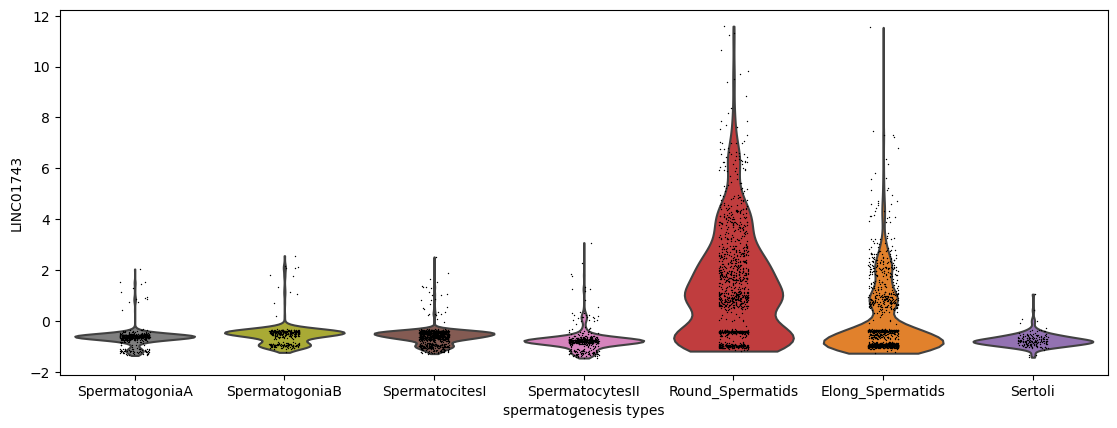

In [34]:
# no. 5 in spermatogonia
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC01743'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocitesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

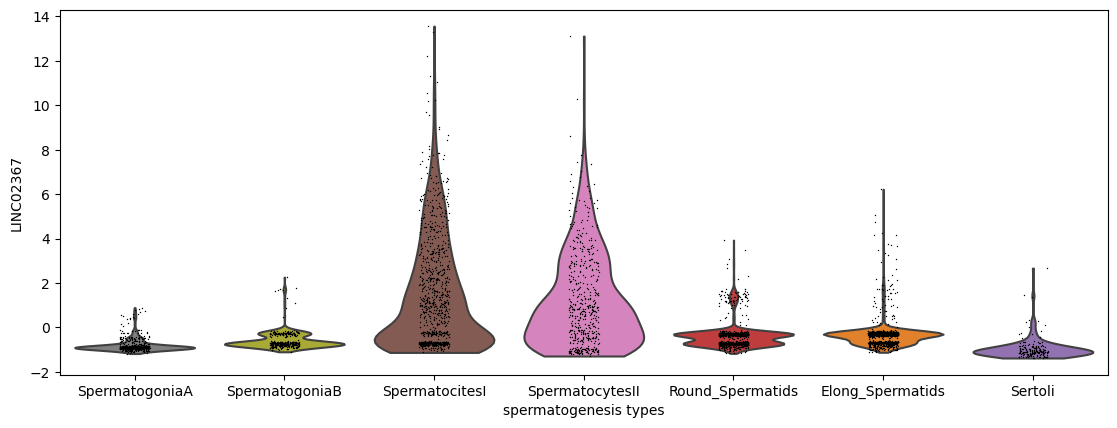

In [35]:
# no. 2 in spermatocytes I
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC02367'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocitesI','SpermatocytesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [22]:
adata.uns['DE_leiden'] # from highest to lowest score

{'logfoldchanges': array([(nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan), ...,
        (nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan)],
       dtype=[('0', '<f4'), ('1', '<f4'), ('2', '<f4'), ('3', '<f4'), ('4', '<f4'), ('5', '<f4'), ('6', '<f4'), ('7', '<f4'), ('8', '<f4')]),
 'names': array([('NFIC', 'TEX51', 'TTC28', 'LRRIQ1', 'FOXP1', 'ANKRD30A', 'KCNQ1', 'LOC101929200', 'MALAT1'),
        ('HDAC11', 'SMIM23', 'HLA-B', 'BCR', 'ACTR3B', 'ZNF385D', 'amplicon-chrY-TSPY1/10/2/3/4/8', 'CLU', 'TSHZ2'),
        ('DRICH1', 'COL25A1', 'PFDN6', 'RGL4', 'TENM3', 'ANKRD30B', 'KCNQ1OT1', 'TBX22', 'DCN'),
        ...,
        ('GPC6', 'ANKRD30A', 'COL25A1', 'DRICH1', 'GLIPR1L1', 'KCNQ1OT1', 'GLIPR1L1', 'ZNF385D-AS2', 'SYCP3'),
        ('LOC101927284', 'ANKRD30B', 'LINC01743', 'TMEM

In [23]:
adata.uns['DE_leiden']['names'][0] # no. 1 for all 7 clusters 

('NFIC', 'TEX51', 'TTC28', 'LRRIQ1', 'FOXP1', 'ANKRD30A', 'KCNQ1', 'LOC101929200', 'MALAT1')

In [24]:
top15_LINC = []
for i in range(15):
    for gene in adata.uns['DE_leiden']['names'][i]:
        if 'LINC' in gene:
            top15_LINC.append(gene)

top15_LINC

['LINC00993', 'LINC01743', 'LINC02367', 'LINC01692', 'LINC01483']

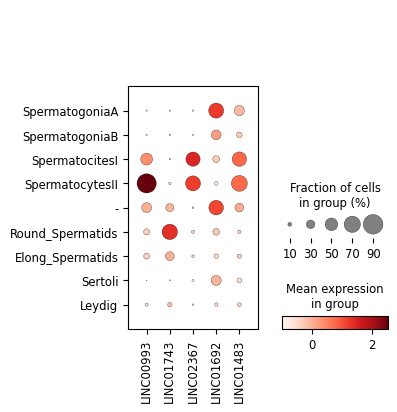

In [31]:
sc.pl.dotplot(adata, top15_LINC, groupby='spermatogenesis_types', categories_order=['SpermatogoniaA','SpermatogoniaB','SpermatocitesI','SpermatocytesII','-','Round_Spermatids','Elong_Spermatids','Sertoli','Leydig'])

In [ ]:

new_names = {
    '0':'Round_Spermatids',
    '1':'-',
    '2':'Round_Spermatids',
    '3':'Elong_Spermatids',
    '4':'SpermatogoniaB',
    '5':'SpermatocytesI',
    '6':'SpermatocitesII',
    '7':'SpermatogoniaA',
    '8':'SpermatocytesI',
    '9':'Sertoli'
}


In [ ]:
adata

In [ ]:
adata.varm['PCs']

In [ ]:
adata.uns['pca']

PC1(1,72 % variance explained), PC2(0,93 % variance explained)

In [ ]:
sc.tl.dendrogram

In [ ]:
sc.pl.correlation_matrix(adata,'spermatogenesis_types', show_correlation_numbers=True)